### Importing spaCy and loading our texts and annotations

In [1]:
import spacy

nlp = spacy.load("nl_core_news_lg")

In [2]:
from tqdm import tqdm

import gzip
import os

import random

import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas

corpus = "./Corpus/"
anns = "./Annotations/"

def load(file, corpus, lines=False):
    with open(os.path.join(corpus, file), "r") as handle:
        if lines:
            return list(handle) # handle.readlines()
        else:
            return handle.read()

### Using csv to read BRAT annotations



In [3]:
def read_csv(file, corpus=anns):
    file = load(file, corpus, lines=True)

    for i, line in enumerate(file):
        if i == 0: print("first line:", line)
        tab_cols = line.split("\t")
        
        if tab_cols[0].startswith("T"):
            last = tab_cols[-1].strip()
            first = tab_cols[0]
            
            middle = tab_cols[1].split()
#             print(middle, middle[0], middle[-1])
            middle = [middle[0], middle[1], middle[-1]]
            
            yield (first, *middle, last)
            
def filter_rows(rows):
    for r in rows:
        if r[1].upper() in ["WOMEN", "INDIGENOUS", "MEN"]:
        #if r[1].upper() in ["PERSON", "ORG", "GPE", "WOMEN", "INDIGENOUS", "MEN"]:
            yield r
        
def change_rows(rows):
    for r in rows:
        entity_nr, entity_type, start, end, label = r
        yield int(start), int(end), entity_type.upper(), label
        


In [4]:
data = {}
listallpeoples = []

for ann_f in os.listdir(anns):
    if len(load(ann_f, anns)) > 0:
        cur_name = ann_f.strip(".ann")
    
        txt_f = cur_name + ".txt"
        if os.path.isfile(os.path.join(corpus, txt_f)):
        
            #raw_text = load(txt_f, corpus)
            brat_entity_list = list(change_rows(filter_rows(read_csv(ann_f, anns))))
            
            data[txt_f] = (brat_entity_list)
        else:
            print("no file", txt_f)
    else:
        print("annotation file empty")

first line: T1	Indigenous 1398 1404	slaven

first line: T1	Person 76 100	Pieter Hendrik Popijwoud

first line: T1	Women 139 145	moeder

first line: T1	Women 590 596	moeden

first line: T1	Person 96 119	Pieter Cornelis Beekman

first line: T1	Person 372 377;378 393	Maria Anthonia Sweers

first line: T1	Men 158 162	Heer

first line: T1	Person 124 141	Andries Jan Zalle

first line: T1	Person 1061 1073	Pieter Arons

first line: T1	Men 79 84	mons:

first line: T1	Person 76 103	Christiaan Ferdinant Cramer

first line: T1	Person 15 32	Cornelis valentyn

first line: T1	Person 626 633;634 642	Abraham Salomons

first line: T1	Person 624 648;649 653	Ian Carelszen Zaelitbra„ „ham

first line: T1	Indigenous 242 254	lijf eigenen

first line: T1	Person 268 275;276 284	Abraham Salomons

first line: T1	GPE 15 22	Batavia

first line: T1	Person 1575 1594	Johannes Laurenzzen

first line: T1	GPE 1591 1598	Malacca

first line: T1	Women 1198 1203	Juff„

first line: T3	Person 1403 1428	ohannas Batthazar David

In [5]:
data

{'NL-HaNA_1.04.02_6847_0085.txt': [(1398, 1404, 'INDIGENOUS', 'slaven'),
  (2259, 2262, 'MEN', 'M:r')],
 'NL-HaNA_1.04.02_6847_0062.txt': [(116, 135, 'WOMEN', 'Cuthanna man Copijn')],
 'NL-HaNA_1.04.02_6847_0015.txt': [(139, 145, 'WOMEN', 'moeder'),
  (298, 301, 'WOMEN', 'zij'),
  (416, 420, 'WOMEN', 'haar'),
  (421, 427, 'WOMEN', 'moeder'),
  (428, 436, 'WOMEN', 'mesust=r'),
  (459, 464, 'WOMEN', 'wed:e'),
  (921, 927, 'MEN', 'zijner'),
  (932, 938, 'WOMEN', 'haarer'),
  (985, 991, 'MEN', 'zijner'),
  (996, 1001, 'WOMEN', 'harer'),
  (1070, 1075, 'MEN', 'voogd'),
  (1080, 1089, 'WOMEN', 'voogdesse'),
  (1790, 1801, 'MEN', 'agt: heeren'),
  (2189, 2199, 'WOMEN', 'Testatrice'),
  (2231, 2234, 'WOMEN', 'zij'),
  (2387, 2391, 'WOMEN', 'haer'),
  (2483, 2487, 'WOMEN', 'hare'),
  (133, 145, 'WOMEN', 'groot moeder'),
  (277, 287, 'WOMEN', 'testatrice')],
 'NL-HaNA_1.04.02_6847_0029.txt': [(590, 596, 'WOMEN', 'moeden'),
  (597, 604, 'WOMEN', 'Juff=mo'),
  (628, 633, 'WOMEN', 'wed:e'),
  (1054

### Terms for men, women and indigenous

In [6]:
def get_terms(data, group):
    for entity_list in data.values():
        for row in entity_list:
            if row[2] == group:
                yield row[3]
                
terms_men = set(get_terms(data, "MEN"))
terms_women = set(get_terms(data, "WOMEN"))
terms_indi = set(get_terms(data, "INDIGENOUS"))

In [7]:
print(terms_men)

{'voogd', 'Mons:r', 'sijn', 'hem', 'soon', 'Eerw: heeren', 'Heeren', 'mons', 'Iongman', 'zijner', 'zoons', 'heer m:r', 'neeven', 'hij', 'De Heer', 'vader', 'Pieter Hendrik Popijwoud', 'oom', 'zoonen', 'sijnen', 'dE:', 'meester', 'schoon Zoon', 'broeder', 'man', 'zijn', 'm:', 'Heer', 'weesm:', 'haer', 'VE:', 'mons:r', 'Heere', 'zyn', 'M:r', 'zoon', 'heeren', 'm:r', 'opperm:', 'wager', 'Ionge', 'heer', 'broeders', 'agt: heeren', 'Eerw: heer', 'booeder', 'Zoon', 'dE', 'heere', 'mons:', 'zoontje'}


In [8]:
print(terms_women)

{'me jnst=m', 'harer', 'Elisabeth magdalena', 'Ins=m', 'Jns=m', 'Just=m', 'zij', 'Clara Geertruijda schoender', 'Jn p=m', 'wese', 'Pavinnen', 'Njai Rentje', 'Cnthanna mara Topijn', 'Enlandsche Crietene', 'Jop=m', 'Christina Bastiana', 'haar', 'puysvrouw', 'Jep=m', 'voogdesse', 'wilhelmina Elisabeth', 'slavinne', 'haker', 'wed:e', 'wij', 'mepnst=', 'testatrice', 'me juw=m', 'JnW=m', 'Dist=m', 'hare', 'Jnst=m', 'Erfgename', 'geertruyda Casparina', 'susters', 'Jnsf=m', 'moeden', 'vrije Christen vrouw', 'vrije Cristene vrouw', 'Cuthanna man Popijn', 'Iuff=m', 'Mepff:r', 'zy', 'Susters', 'huijsbrouw', 'wed=e', 'huifsvrouw', 'Jnst=r', 'Stariynen', 'huijsvrouw', 'Hluste', 'pebronella Iohanna Brouwer', 'Jnisvrouw', 'moeder', 'Sister', 'Slavinne', 'Juff=r', 'zuiders', 'Jongste dogter', 'Anna Elisabeth', 'wijff', 'nigt', 'Iup=m', 'Jntt=e', 'Pijs=m', 'Iufrouw', 'Juff„', 'mepst=m', 'Juffrouw', 'zuster', 'Mejufrouw', 'Wilhelmina Elrabesh', 'doopdogter', 'mesust=m', 'Cuthanna man Copijn', 'machome',

In [9]:
print(terms_indi)

{'slaaff', 'mandadoor de vrije', 'sla„ vernije', 'lijf eigenen', 'lijf eijdenen', 'slaaf', 'inlanderen', 'Pavinnen', 'vrije Ionge', 'vrije Christen vrouw', 'Saroenie', 'vrije Cristene vrouw', 'Njai Rentje', 'slaven, nen', 'Leo', 'lijf eidenen', 'Enlandsche Crietene', 'sla „kinnen', 'sla„ verrige', 'slaeven', 'slaven', 'Stariynen', 'lijff Eigenen', 'vrije fristen vrouw', 'vrije Chrisle vrouw', 'Vai', 'sla„ verrije', 'slavinne', 'lijfeigenen', 'maleijdse vrouw', 'vrije Cristen vion', 'lijf eijgenen', 'slaaven', 'slavinnen', 'De moor', 'lijf Eigenen', 'Slavinne', 'Lijfflijgenen'}


In [10]:
terms_indi_women = terms_women & terms_indi

### Creating an index for women, indigenous (make CSV)
### Counting instances of indigenous as compared with number of pages


In [11]:
test_corpus = "./TestCorpus"

docs = {f: load(f, test_corpus) for f in filter(lambda f: f.endswith(".txt"), os.listdir(test_corpus))}

In [12]:
def build_group_regex(term_set):
    escaped = {re.escape(s) for s in term_set}
    return r"|".join(["[\s+|^]("+t+")\s+" for t in reversed(sorted(escaped, key=len))])

def get_mentions(text, group_regex):
    for m in re.finditer(group_regex, text):
        found_term = m.group()
        stripped = found_term.lstrip()
        
        if stripped == found_term:
            yield m.start(), found_term.rstrip()
        else:
            yield (m.start() + (len(found_term) - len(stripped))), stripped.rstrip()


def get_group_records(docs, group_terms):
    group_regex = build_group_regex(group_terms)

    for fname, txt in docs.items():
        for ind, found_term in get_mentions(txt, group_regex):
            yield(fname, ind, found_term)

In [17]:
import pandas as pd
women_records = list(get_group_records(docs, terms_women))
women_df = pandas.DataFrame.from_records(women_records, columns=["filename", "start_index", "identifier_term"])

men_records = list(get_group_records(docs, terms_men))
men_df = pandas.DataFrame.from_records(men_records, columns=["filename", "start_index", "identifier_term"])

In [18]:
women_df

,filename,start_index,identifier_term
0,NL-HaNA_1.04.02_6847_0887.txt,794,vrouw
1,NL-HaNA_1.04.02_6847_0887.txt,2274,haar
2,NL-HaNA_1.04.02_6847_0891.txt,521,Erfgename
3,NL-HaNA_1.04.02_6847_0891.txt,1494,haar
4,NL-HaNA_1.04.02_6847_0813.txt,77,slavinne
...,...,...,...
518,NL-HaNA_1.04.02_6847_0863.txt,1688,Jnst=m
519,NL-HaNA_1.04.02_6847_0876.txt,419,haar
520,NL-HaNA_1.04.02_6847_0876.txt,955,zy
521,NL-HaNA_1.04.02_6847_0876.txt,994,zij


In [15]:
print("Percentage of docs with women (at least): ", women_df.filename.unique().shape[0]/len(docs))


women_per_doc = women_df.groupby("filename").apply(lambda df: df.shape[0])
print("Mean and std. dev. number of woman metions per document: ", women_per_doc.mean(), women_per_doc.var()**.5)

Percentage of docs with women (at least):  0.9285714285714286
Mean and std. dev. number of woman metions per document:  4.47008547008547 2.796465286049545


AttributeError: Unknown property aspect

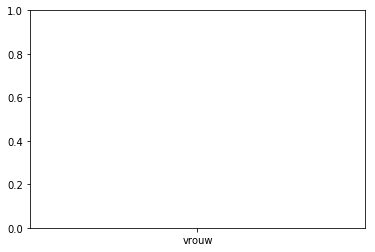

In [25]:
g = sns.histplot(women_df, x="identifier_term")
_ = plt.xticks(rotation=90)
plt.title("Histogram of usage of identifier terms for women")

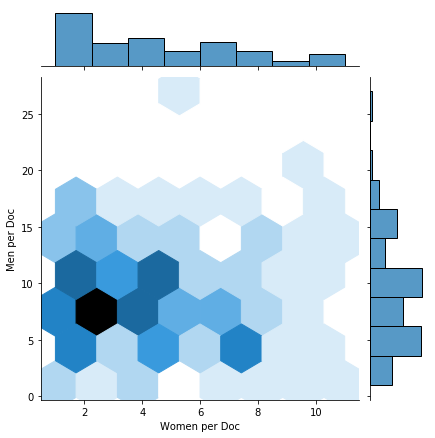

In [42]:
men_per_doc = men_df.groupby("filename").apply(lambda df: df.shape[0])


sns.jointplot(x=women_per_doc, y=men_per_doc, kind="hex")
_ = plt.xlabel("Women per Doc")
_ = plt.ylabel("Men per Doc")

In [50]:
for x in women_df.iterrows():
    print(x[1].filename)
    print("----")

NL-HaNA_1.04.02_6847_0887.txt
----
NL-HaNA_1.04.02_6847_0887.txt
----
NL-HaNA_1.04.02_6847_0891.txt
----
NL-HaNA_1.04.02_6847_0891.txt
----
NL-HaNA_1.04.02_6847_0813.txt
----
NL-HaNA_1.04.02_6847_0813.txt
----
NL-HaNA_1.04.02_6847_0813.txt
----
NL-HaNA_1.04.02_6847_0813.txt
----
NL-HaNA_1.04.02_6847_0813.txt
----
NL-HaNA_1.04.02_6847_0813.txt
----
NL-HaNA_1.04.02_6847_0813.txt
----
NL-HaNA_1.04.02_6847_0813.txt
----
NL-HaNA_1.04.02_6847_0813.txt
----
NL-HaNA_1.04.02_6847_0813.txt
----
NL-HaNA_1.04.02_6847_0813.txt
----
NL-HaNA_1.04.02_6847_0820.txt
----
NL-HaNA_1.04.02_6847_0865.txt
----
NL-HaNA_1.04.02_6847_0865.txt
----
NL-HaNA_1.04.02_6847_0865.txt
----
NL-HaNA_1.04.02_6847_0865.txt
----
NL-HaNA_1.04.02_6847_0865.txt
----
NL-HaNA_1.04.02_6847_0865.txt
----
NL-HaNA_1.04.02_6847_0865.txt
----
NL-HaNA_1.04.02_6847_0865.txt
----
NL-HaNA_1.04.02_6847_0919.txt
----
NL-HaNA_1.04.02_6847_0919.txt
----
NL-HaNA_1.04.02_6847_0919.txt
----
NL-HaNA_1.04.02_6847_0919.txt
----
NL-HaNA_1.04.02_6847

NL-HaNA_1.04.02_6847_0909.txt
----
NL-HaNA_1.04.02_6847_0909.txt
----
NL-HaNA_1.04.02_6847_0909.txt
----
NL-HaNA_1.04.02_6847_0815.txt
----
NL-HaNA_1.04.02_6847_0815.txt
----
NL-HaNA_1.04.02_6847_0888.txt
----
NL-HaNA_1.04.02_6847_0888.txt
----
NL-HaNA_1.04.02_6847_0822.txt
----
NL-HaNA_1.04.02_6847_0822.txt
----
NL-HaNA_1.04.02_6847_0822.txt
----
NL-HaNA_1.04.02_6847_0822.txt
----
NL-HaNA_1.04.02_6847_0822.txt
----
NL-HaNA_1.04.02_6847_0822.txt
----
NL-HaNA_1.04.02_6847_0822.txt
----
NL-HaNA_1.04.02_6847_0822.txt
----
NL-HaNA_1.04.02_6847_0854.txt
----
NL-HaNA_1.04.02_6847_0854.txt
----
NL-HaNA_1.04.02_6847_0854.txt
----
NL-HaNA_1.04.02_6847_0854.txt
----
NL-HaNA_1.04.02_6847_0854.txt
----
NL-HaNA_1.04.02_6847_0854.txt
----
NL-HaNA_1.04.02_6847_0854.txt
----
NL-HaNA_1.04.02_6847_0875.txt
----
NL-HaNA_1.04.02_6847_0875.txt
----
NL-HaNA_1.04.02_6847_0875.txt
----
NL-HaNA_1.04.02_6847_0875.txt
----
NL-HaNA_1.04.02_6847_0875.txt
----
NL-HaNA_1.04.02_6847_0895.txt
----
NL-HaNA_1.04.02_6847

### other stats
